<a href="https://colab.research.google.com/github/Li-zhuoran/assistive_book/blob/main/Assistive_Gym_Common_Commands.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assistive Gym - Common Commands

# Table of Contents

### Generic Robot and Human Functions
[Get joint angles](#scrollTo=zugzbGhrEaTH&line=2&uniqifier=1)  
[Get joint position / orientation](#scrollTo=4DzTxuYAFP0o&line=4&uniqifier=1)  
[Transform poses to robot base coordinate frame](#scrollTo=jkrw6iT5GkAU&line=2&uniqifier=1)  
[Get base pose](#scrollTo=UhYz0XLjHL8w&line=2&uniqifier=1)  
[Get link velocity](#scrollTo=pmXTDRFDHw_D&line=1&uniqifier=1)  
[Control actuators](#scrollTo=PS-KF9xqHrEr&line=2&uniqifier=1)  
[Get collision info](#scrollTo=Po3brnI7LGey&line=1&uniqifier=1)  
[Get closest points between two bodies](#scrollTo=1TLGT1anL0CQ&line=1&uniqifier=1)  
[Get force/torque sensor data](#scrollTo=aF7YBm-tNs6m&line=2&uniqifier=1)  
[Set base pose/velocity](#scrollTo=AiqHSuipMIgh&line=1&uniqifier=1)  
[Set joint angles](#scrollTo=lmsmAEJ5MMgX&line=1&uniqifier=1)  
[Set frictions](#scrollTo=4wkcfiTdMV0U&line=1&uniqifier=1)  
[Change body gravity](#scrollTo=aI60PlA7Nv9c&line=1&uniqifier=1)  
[Inverse kinematics](#scrollTo=3Xe7VFZhOIK-&line=1&uniqifier=1)  
[Print all joint info](#scrollTo=GTEOdPG_IQsL&line=1&uniqifier=1)  

### Robot-specific Functions
[Enable wheels](#scrollTo=yAhmAEOwnoHm&line=1&uniqifier=1)  
[Open/close gripper](#scrollTo=X3KDUQ9pnyUL&line=1&uniqifier=1)  

### Environment Functions
[Gym functions](#scrollTo=HsBRRCIHNDXa&line=1&uniqifier=1)  
[Build a basic assistive environment](#scrollTo=Eie4rBPqtOgw&line=1&uniqifier=1)  
[Convert between Euler/quaternion](#scrollTo=iWC5Ufc3ve4H&line=2&uniqifier=1)  
[Set seed](#scrollTo=JXm8BMpxqk-7&line=1&uniqifier=1)  
[Initialize environment variables](#scrollTo=XY5N3jMTsu0s&line=1&uniqifier=1)  
[Create human](#scrollTo=MnxaaWFBuBAt&line=1&uniqifier=1)  
[Create robot](#scrollTo=u_90-qTPuDtS&line=1&uniqifier=1)  
[Human preferences](#scrollTo=GYxru56cuzC5&line=1&uniqifier=1)  
[Initialize robot base pose](#scrollTo=wzPQCN61vBVY&line=1&uniqifier=1)  
[Setup camera](#scrollTo=fcpL4jfSwCSC&line=1&uniqifier=1)  
[Get RGB / depth image](#scrollTo=c2oZAjWiwMk1&line=1&uniqifier=1)  
[Create spheres](#scrollTo=idTkd2Z7wTfY&line=3&uniqifier=1)  
[Turn arbitrary .obj into an agent](#scrollTo=GTOzKrRhw6Ks&line=1&uniqifier=1)  
[Disconnect](#scrollTo=5FvUn2xJr-0b&line=1&uniqifier=1)  

# Environment Setup

Install Assistive Gym

In [ ]:
%%time
%%capture
# NOTE: Installation currently takes ~5 minutes.
!pip install git+https://github.com/Healthcare-Robotics/assistive-gym.git

CPU times: user 1.01 s, sys: 220 ms, total: 1.23 s
Wall time: 6min 46s


In [ ]:
import os, gym
import numpy as np
import assistive_gym
from numpngw import write_png, write_apng
from IPython.display import display, Image
np.set_printoptions(suppress=True, precision=3)

Setup an environment to test commands with.

In [ ]:
%%capture
# Make a feeding assistance environment with the PR2 robot.
env = gym.make('FeedingPR2-v1')
# Setup a camera in the environment to capture images (for rendering)
env.setup_camera(camera_eye=[0.5, -0.75, 1.5], camera_target=[-0.2, 0, 0.75], fov=60, camera_width=1920//4, camera_height=1080//4)

Visualize the environment

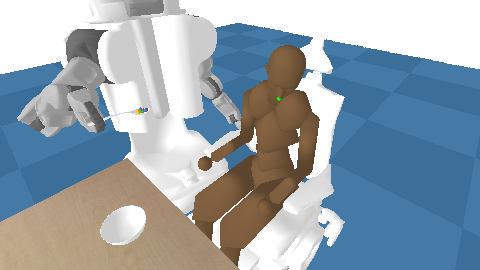

In [ ]:
observation = env.reset()
frames = []
# Simulate 50 time steps
for i in range(50):
    # Step the simulation forward. Have the robot take a random action.
    observation, reward, done, info = env.step(env.action_space.sample())
    # Capture (render) an image from the camera
    img, depth = env.get_camera_image_depth()
    frames.append(img)
# Compile and display rendered animation of the environment
write_apng('output.png', frames, delay=100)
display(Image(filename='output.png'))

# Generic Robot and Human Functions

All of the major functions that are available for all agents (both robots and human models) are here:  
https://github.com/Healthcare-Robotics/assistive-gym/blob/main/assistive_gym/envs/agents/agent.py

There are also a few robot specific functions which are implemented here:  
https://github.com/Healthcare-Robotics/assistive-gym/blob/main/assistive_gym/envs/agents/robot.py

And a few human specific functions which are implemented here:  
https://github.com/Healthcare-Robotics/assistive-gym/blob/main/assistive_gym/envs/agents/human.py

#### Get joint angles

In [ ]:
print('All joint angles:\n', env.robot.get_joint_angles()) # Get the joint angles for all of the robot's joints
print('Right arm joint angles:', env.robot.get_joint_angles(env.robot.right_arm_joint_indices))

All joint angles:
 [ 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.    -0.812  0.258 -1.235  0.    -1.107 -2.383  0.    -0.637
 -1.288  0.     0.     0.     0.     0.    -0.     0.03   0.03   0.03
  0.03   0.     0.     0.     1.75   1.25   1.5    0.    -0.5    1.
  0.     0.     1.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.   ]
Right arm joint angles: [-0.812  0.258 -1.235 -1.107 -2.383 -0.637 -1.288]


#### Get 3D position/orientation of a joint in global space

In [ ]:
pos, orient = env.robot.get_pos_orient(env.robot.right_end_effector)
print('Right end effector 3D position:', pos)
print('Right end effector quaternion orientation:', orient)
print('Right end effector Euler orientation:', env.get_euler(orient))

Right end effector 3D position: [-0.13  -0.724  1.002]
Right end effector quaternion orientation: [ 0.642  0.08  -0.217  0.731]
Right end effector Euler orientation: [ 1.393  0.407 -0.236]


#### Transform pose to robot base coordinate frame
This is important since real robots generally don't have access to a 'world' coordinate system, and all positions and orientations are relative to their own base position.

In [ ]:
pos, orient = env.robot.get_pos_orient(env.robot.right_end_effector)
pos_real, orient_real = env.robot.convert_to_realworld(pos, orient)
print('Right end effector global position:', pos)
print('Right end effector position relative to base pose:', pos_real)

Right end effector global position: [-0.13  -0.724  1.002]
Right end effector position relative to base pose: [ 0.759 -0.482  1.002]


#### Get base pose (in world coordinates)

In [ ]:
base_pos, base_orient = env.robot.get_base_pos_orient()
print('Robot global base position:', base_pos)
print('Robot global base orientation:', base_orient)

Robot global base position: [-0.789 -0.112  0.   ]
Robot global base orientation: [ 0.     0.    -0.091  0.996]


#### Get velocity of a link

In [ ]:
print('Right end effector velocity:', env.robot.get_velocity(env.robot.right_end_effector))

Right end effector velocity: (-0.04048215193113999, 0.004755172180068476, -0.0001866023429279108)


#### Control actuators
Using an internal PID controller for each actuator.
We can control both robots and humans.

In [ ]:
print('Robot left end effector position:', env.robot.get_pos_orient(env.robot.left_end_effector)[0])
env.robot.control(env.robot.left_arm_joint_indices, np.ones(len(env.robot.left_arm_joint_indices)), gains=0.2, forces=1)
# Perform a simulation time step.
print('Stepping the simulator forward one time step (0.1 seconds)')
env.step(env.action_space.sample())
print('New robot left end effector position:', env.robot.get_pos_orient(env.robot.left_end_effector)[0])

# NOTE: The following code controls the human joints. This only works when you create a non-static human.
# print('Human left hand position:', env.human.get_pos_orient(env.human.left_wrist)[0])
# env.human.control(env.human.left_arm_joints, np.ones(len(env.human.left_arm_joints)), gains=0.05, forces=1)
# # Perform a simulation time step.
# print('Stepping the simulator forward one time step (0.1 seconds)')
# env.step(env.action_space.sample())
# print('New human left hand position:', env.human.get_pos_orient(env.human.left_wrist)[0])

Robot left end effector position: [-0.564  0.462  0.329]
Stepping the simulator forward one time step (0.1 seconds)
New robot left end effector position: [-0.568  0.469  0.327]


#### Get collision points
Get all points of contact between two simulated bodies (e.g. robot and human). Includes positions and forces between the two bodies.

In [ ]:
linkA, linkB, posA, posB, force = env.robot.get_contact_points(agentB=env.human)
if len(posA) == 0:
    print('Robot not in contact with the human')
else:
    print('Robot in contact with human')
    print('Total number of contact points:', len(force))
    print('3D position of one contact point:', posA[0])
    print('Total force applied:', np.sum(force))

Robot not in contact with the human


#### Get closest points between two bodies
Helpful for checking how far away a robot is from other objects or people in the environment.

In [ ]:
linkA, linkB, posA, posB, contact_distance = env.robot.get_closest_points(env.human, distance=4.0)
print('Shortest Euclidean distance between robot and entire human body:', np.min(contact_distance))

Shortest Euclidean distance between robot and entire human body: 0.32553020981107517


#### Get 3D force / torque vectors from a 6-axis force/torque sensor

In [ ]:
env.robot.enable_force_torque_sensor(env.robot.right_end_effector)
env.step(env.action_space.sample())
force_torque = env.robot.get_force_torque_sensor(env.robot.right_end_effector)
print('Force applied at right end effector:', force_torque[:3])
print('Torque at right end effector:', force_torque[3:])

Force applied at right end effector: [-0.058 -1.071 -0.678]
Torque at right end effector: [-0.07  -0.002  0.001]


#### Set base pose and velocity

In [ ]:
base_pos, base_orient = env.robot.get_base_pos_orient()
print('Current robot base position:', base_pos)
env.robot.set_base_pos_orient(base_pos + np.array([-0.1, 0, 0]), base_orient)
print('New robot base position:', env.robot.get_base_pos_orient()[0])
env.robot.set_base_velocity(linear_velocity=[0, 0, 0], angular_velocity=[0, 0, 0])

Current robot base position: [-0.789 -0.112  0.   ]
New robot base position: [-0.889 -0.112  0.   ]


#### Set joint angles

In [ ]:
print('Current human right arm joint angles:', env.human.get_joint_angles(env.human.right_arm_joints))
env.human.set_joint_angles(env.human.right_arm_joints, np.ones(len(env.human.right_arm_joints)), use_limits=True, velocities=0)
print('New human right arm joint angles:', env.human.get_joint_angles(env.human.right_arm_joints))

Current human right arm joint angles: [ 0.     0.     0.     0.087  0.     0.    -1.571  0.     0.     0.   ]
New human right arm joint angles: [0.175 0.524 0.611 1.    1.    1.    0.    1.    1.    0.82 ]


#### Set frictions

In [ ]:
print('Changing friction of the ground plane')
env.plane.set_frictions(env.plane.base, lateral_friction=env.np_random.uniform(0.025, 0.5), spinning_friction=0, rolling_friction=0)
print('Changing friction of the robot wheels')
env.robot.set_frictions(env.robot.wheel_joint_indices, lateral_friction=0.5, spinning_friction=0, rolling_friction=0)

Changing friction of the ground plane
Changing friction of the robot wheels


#### Change gravity for just one body

In [ ]:
print('Enabling gravity on the robot')
env.robot.set_gravity(ax=0.0, ay=0.0, az=-9.81)
print('Disabling gravity on the robot')
env.robot.set_gravity(ax=0.0, ay=0.0, az=0.0)

Enabling gravity on the robot
Disabling gravity on the robot


#### Inverse kinematics

In [ ]:
print('Current right arm joint angles:', env.robot.get_joint_angles(env.robot.right_arm_joint_indices))
pos, orient = env.robot.get_pos_orient(env.robot.right_end_effector)
target_pos = pos + np.array([0, 0, 0.1]) # 10 cm upwards along the Z-axis
target_orient = orient
target_joint_angles = env.robot.ik(env.robot.right_end_effector, target_pos, target_orient,
                                   env.robot.right_arm_ik_indices, max_iterations=1000, use_current_as_rest=True)
print('Joint angles needed to move right end effector 10 cm upwards:', target_joint_angles)

Current right arm joint angles: [-0.806  0.271 -1.197 -1.086 -2.404 -0.671 -1.32 ]
Joint angles needed to move right end effector 10 cm upwards: [-0.798  0.116 -1.148 -1.087 -2.273 -0.796 -1.359]


#### Print all available joints, joint IDs, and other joint details
See the PyBullet documentation for more details:  
https://docs.google.com/document/d/10sXEhzFRSnvFcl3XxNGhnD4N2SedqwdAvK3dsihxVUA/preview#heading=h.la294ocbo43o

In [ ]:
env.robot.print_joint_info()

# Robot-specific Functions

#### Enable wheels for control

In [ ]:
env.robot.enable_wheels()

#### Open/close gripper

In [ ]:
env.robot.set_gripper_open_position(env.robot.right_gripper_indices, [0.03]*len(env.robot.right_gripper_indices),
                                    set_instantly=True, force=500)

# Environment Functions

#### Gym functions
Assistive Gym follows the OpenAI Gym interface. All of the basic Gym functions are available.

```python
env.step(action)
env.render()
env.reset()
env._get_obs()
```

#### Build a basic assistive environment
Creates the ground plane and sets up any robot or human that was added to the environment during initialization. Also creates a wheelchair or bed in the environment for the human.

In [ ]:
env.build_assistive_env(furniture_type='wheelchair', fixed_human_base=True, human_impairment='random', gender='random')

Convert between Euler/quaternion

In [ ]:
euler = [0, np.pi/2, -np.pi/2]
quaternion = env.get_quaternion(euler)
euler = env.get_euler(quaternion)
print('Euler:', euler, 'Quaternion:', quaternion)

Euler: [ 0.     1.571 -1.571] Quaternion: [ 0.5  0.5 -0.5  0.5]


#### Set seed

In [ ]:
env.set_seed(200)

#### Initialize environment variables
Call this when you create a new environment or add a new robot/human.

In [ ]:
env.init_env_variables(True)

/usr/local/lib/python3.6/dist-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


#### Create human
Create a new human model and add it into the environment.

In [ ]:
from assistive_gym.envs.agents import human
controllable_joints = human.right_arm_joints + human.head_joints
human = env.create_human(controllable=True, controllable_joint_indices=controllable_joints, fixed_base=True, 
                         human_impairment='random', gender='random', mass=None, radius_scale=1.0, height_scale=1.0)

#### Create robot
Create a new robot and add it into the environment.

In [ ]:
from assistive_gym.envs.agents.sawyer import Sawyer
robot = env.create_robot(Sawyer, controllable_joints='right', fixed_base=True)

#### Human preferences
See implementation for how each parameter is used:  
https://github.com/Healthcare-Robotics/assistive-gym/blob/main/assistive_gym/envs/env.py#L237

In [ ]:
preference_reward = env.human_preferences(end_effector_velocity=0, total_force_on_human=0, tool_force_at_target=0,
                                          food_hit_human_reward=0, food_mouth_velocities=[], dressing_forces=[[]],
                                          arm_manipulation_tool_forces_on_human=[0, 0], arm_manipulation_total_force_on_human=0)

#### Initialize robot base pose
Performs TOC base pose optimization for non-stationary robots.  
Performs random restart IK for stationary (e.g. table-mounted, wheelchair-mounte) robots.

In [ ]:
env.reset()
# Set the starting end effector position
target_ee_pos = [0, -0.5, 1.0]
# Get a predefined starting end effector orientation for this robot/task combination
target_ee_orient = env.get_quaternion(env.robot.toc_ee_orient_rpy[env.task])
# Set all of the end effector poses that the robot is required to be able to reach
start_pos_orient = [(target_ee_pos, target_ee_orient)]
# Set all of the target end effector poses (the more poses the robot can reach, the higher a random base pose is scored)
shoulder_pos = env.human.get_pos_orient(env.human.right_shoulder)[0]
elbow_pos = env.human.get_pos_orient(env.human.right_elbow)[0]
wrist_pos = env.human.get_pos_orient(env.human.right_wrist)[0]
target_pos_orients = [(shoulder_pos, None), (elbow_pos, None), (wrist_pos, None)]

# Initialize robot base pose
env.init_robot_pose(target_ee_pos, target_ee_orient, start_pos_orient, target_pos_orients, arm='right',
                    tools=[env.tool], collision_objects=[env.human, env.furniture], wheelchair_enabled=True,
                    right_side=True, max_iterations=3)
base_pos, base_orient = env.robot.get_base_pos_orient()
print('Optimized robot base position:', base_pos, 'orientation:', base_orient)

Optimized robot base position: [-1.004 -0.033  0.975] orientation: [0.    0.    0.192 0.981]


#### Setup camera

In [ ]:
# Setup a camera given an a location for the camera and a target position to look at.
env.setup_camera(camera_eye=[0.5, -0.75, 1.5], camera_target=[-0.2, 0, 0.75], fov=60, camera_width=1920//4, camera_height=1080//4)
# Setup a camera using roll, pitch, yaw angles.
env.setup_camera_rpy(camera_target=[-0.2, 0, 0.75], distance=1.5, rpy=[0, -35, 40], fov=60, camera_width=1920//4, camera_height=1080//4)

#### Get RGB / depth image

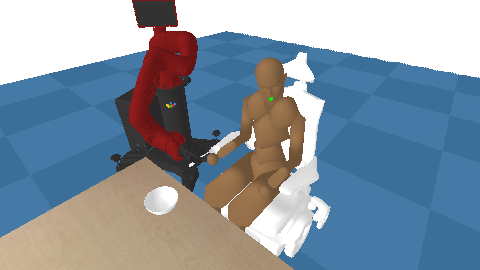

In [ ]:
img, depth = env.get_camera_image_depth(light_pos=[0, -3, 1], shadow=False, ambient=0.8, diffuse=0.3, specular=0.1)
write_png('output_image.png', img)
display(Image(filename='output_image.png'))

#### Create spheres

In [ ]:
# Create one sphere with both a visual and collision body
sphere = env.create_sphere(radius=0.01, mass=0.0, pos=[0, 0, 0], visual=True, collision=True, rgba=[0, 1, 1, 1])

# Create multiple spheres with only visual bodies (these spheres cannot collide with other objects in the environment)
radius = 0.01
batch_positions = []
for i in range(2):
    for j in range(2):
        for k in range(2):
            batch_positions.append(np.array([i*2*radius, j*2*radius, k*2*radius]))
spheres = env.create_spheres(radius=radius, mass=0.0, batch_positions=batch_positions, visual=True, collision=False, rgba=[0, 1, 1, 1])

#### Turn any arbitrary `.obj` file into an agent that has all the above robot/human functions available

In [ ]:
visual_filename = os.path.join(env.directory, 'dinnerware', 'bowl.obj')
collision_filename = os.path.join(env.directory, 'dinnerware', 'bowl_vhacd.obj')
bowl = env.create_agent_from_obj(visual_filename, collision_filename, scale=0.75, mass=1.0, pos=[0, -0.5, 1.0], orient=[0, 0, 0, 1], rgba=[0.5, 1, 0.5, 1], maximal=False)

#### Disconnect
Disconnect the environment from the PyBullet physics engine. Use this when you are done with the environment.

In [ ]:
env.disconnect()